In [1]:
# !pip install kaggle

In [2]:
import os

print("current working directory: " + os.getcwd())

# set cwd to whatever directory you want the dataset to be downloaded to
# os.chdir("C:\\Users\\youyo\\Downloads")

print("current working directory: " + os.getcwd())

current working directory: c:\Users\youyo\Downloads\Plant Classification\Plant Classification
current working directory: c:\Users\youyo\Downloads\Plant Classification\Plant Classification


In [3]:
# import kagglehub

# # Download the latest version of the dataset
# path = kagglehub.dataset_download("abdallahalidev/plantvillage-dataset", download_dir=os.getcwd())

# # Print the path to the downloaded dataset
# print("Path to dataset files:", path)

In [4]:
path =  r"C:\Users\youyo\.cache\kagglehub\datasets\abdallahalidev\plantvillage-dataset\versions\3"

In [5]:
import os

# Define the parent directory where all the folders are located
parent_dir = path + "\\plantvillage dataset\\color"

# Get a list of all folders in the parent directory
folders = [f for f in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, f))]

# Create a dictionary to group folders with the same base name
folder_groups = {}
for folder in folders:
    if '___' in folder:
        base_name = folder.split('___')[0]
        if base_name not in folder_groups:
            folder_groups[base_name] = []
        folder_groups[base_name].append(folder)

In [6]:
folder_groups

{'Apple': ['Apple___Apple_scab',
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy'],
 'Blueberry': ['Blueberry___healthy'],
 'Cherry_(including_sour)': ['Cherry_(including_sour)___healthy',
  'Cherry_(including_sour)___Powdery_mildew'],
 'Corn_(maize)': ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Common_rust_',
  'Corn_(maize)___healthy',
  'Corn_(maize)___Northern_Leaf_Blight'],
 'Grape': ['Grape___Black_rot',
  'Grape___Esca_(Black_Measles)',
  'Grape___healthy',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'],
 'Orange': ['Orange___Haunglongbing_(Citrus_greening)'],
 'Peach': ['Peach___Bacterial_spot', 'Peach___healthy'],
 'Pepper,_bell': ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy'],
 'Potato': ['Potato___Early_blight',
  'Potato___healthy',
  'Potato___Late_blight'],
 'Raspberry': ['Raspberry___healthy'],
 'Soybean': ['Soybean___healthy'],
 'Squash': ['Squash___Powdery_mildew'],
 'Strawberry': ['Strawberry___healthy

In [7]:
len(folder_groups)

14

In [8]:
#print all the keys that have exactly 1 value
for key, value in folder_groups.items():
    if len(value) == 1:
        print(key, value)

Blueberry ['Blueberry___healthy']
Orange ['Orange___Haunglongbing_(Citrus_greening)']
Raspberry ['Raspberry___healthy']
Soybean ['Soybean___healthy']
Squash ['Squash___Powdery_mildew']


In [9]:
folder_groups = {k: v for k, v in folder_groups.items() if len(v) > 1}
folder_groups

{'Apple': ['Apple___Apple_scab',
  'Apple___Black_rot',
  'Apple___Cedar_apple_rust',
  'Apple___healthy'],
 'Cherry_(including_sour)': ['Cherry_(including_sour)___healthy',
  'Cherry_(including_sour)___Powdery_mildew'],
 'Corn_(maize)': ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Common_rust_',
  'Corn_(maize)___healthy',
  'Corn_(maize)___Northern_Leaf_Blight'],
 'Grape': ['Grape___Black_rot',
  'Grape___Esca_(Black_Measles)',
  'Grape___healthy',
  'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'],
 'Peach': ['Peach___Bacterial_spot', 'Peach___healthy'],
 'Pepper,_bell': ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy'],
 'Potato': ['Potato___Early_blight',
  'Potato___healthy',
  'Potato___Late_blight'],
 'Strawberry': ['Strawberry___healthy', 'Strawberry___Leaf_scorch'],
 'Tomato': ['Tomato___Bacterial_spot',
  'Tomato___Early_blight',
  'Tomato___healthy',
  'Tomato___Late_blight',
  'Tomato___Leaf_Mold',
  'Tomato___Septoria_leaf_spot',
  'Toma

In [10]:
len(folder_groups)

9

In [11]:
#print all the values
for key, value in folder_groups.items():
    print(key, value)

Apple ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']
Cherry_(including_sour) ['Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew']
Corn_(maize) ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight']
Grape ['Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']
Peach ['Peach___Bacterial_spot', 'Peach___healthy']
Pepper,_bell ['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy']
Potato ['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']
Strawberry ['Strawberry___healthy', 'Strawberry___Leaf_scorch']
Tomato ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___To

In [12]:
category2index = {category: idx for (idx, category) in enumerate(folder_groups)}
category2index

{'Apple': 0,
 'Cherry_(including_sour)': 1,
 'Corn_(maize)': 2,
 'Grape': 3,
 'Peach': 4,
 'Pepper,_bell': 5,
 'Potato': 6,
 'Strawberry': 7,
 'Tomato': 8}

In [13]:
# Compile a list of images and corresponding labels.

imagepaths = []
labels = []
full_labels = []

for category, subcategory in folder_groups.items():
  for subcat in subcategory:
    subcategory_directory = parent_dir + "/" + subcat
    subcategory_imagenames = os.listdir(subcategory_directory)
    imagepaths += [os.path.join(subcategory_directory, imagename)
                        for imagename in subcategory_imagenames]
    labels += [category2index[category]] * len(subcategory_imagenames)
    full_labels += [subcat] * len(subcategory_imagenames)

In [14]:
# Sort imagepaths alphabetically and labels accordingly.
sorted_pairs = sorted(zip(imagepaths, labels, full_labels), key = lambda x: x[0])
imagepaths, labels, full_labels = zip(*sorted_pairs)


In [15]:
import pandas as pd

data = pd.DataFrame()

data['imagepaths'] = imagepaths
data['labels'] = labels
data['full_labels'] = full_labels

In [16]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [17]:
from sklearn.model_selection import train_test_split
train_data, rest_data = train_test_split(data, train_size=0.75, shuffle=True, random_state=10)
validation_data, test_data = train_test_split(rest_data, test_size=0.5, shuffle=True, random_state=10)

In [18]:
train_data = train_data.reset_index(drop=True)
validation_data = validation_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [19]:
train_data

,imagepaths,labels,full_labels
0,C:\Users\youyo\.cache\kagglehub\datasets\abdal...,1,Cherry_(including_sour)___healthy
1,C:\Users\youyo\.cache\kagglehub\datasets\abdal...,8,Tomato___healthy
2,C:\Users\youyo\.cache\kagglehub\datasets\abdal...,4,Peach___Bacterial_spot
3,C:\Users\youyo\.cache\kagglehub\datasets\abdal...,2,Corn_(maize)___Common_rust_
4,C:\Users\youyo\.cache\kagglehub\datasets\abdal...,8,Tomato___healthy
...,...,...,...
29995,C:\Users\youyo\.cache\kagglehub\datasets\abdal...,3,Grape___Esca_(Black_Measles)
29996,C:\Users\youyo\.cache\kagglehub\datasets\abdal...,3,Grape___Black_rot
29997,C:\Users\youyo\.cache\kagglehub\datasets\abdal...,8,Tomato___Septoria_leaf_spot
29998,C:\Users\youyo\.cache\kagglehub\datasets\abdal...,8,Tomato___Septoria_leaf_spot


In [20]:
train_data['labels'].value_counts()

labels
8    13585
3     3030
2     2884
0     2358
4     1989
5     1869
6     1629
1     1462
7     1194
Name: count, dtype: int64

In [21]:
import torch #gpu acceleration
device = "cpu"
if (torch.cuda.is_available()):
  device = "cuda"
print("device: " + device)

device: cuda


In [22]:
import os
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

#Custom Dataset class to utilize Dataframes for training pipeline
class PlantClassification(Dataset):
  def __init__(self, df, transform = None):

    self.transform = transform #transformations to be applied to the images
    self.df = df #dataframe containing the images and labels


  def __len__(self):
    return len(self.df) #return length of dataframe

  def __getitem__(self, index):
    image = Image.open(self.df['imagepaths'][index]).convert('RGB')
    if self.transform:
      image = self.transform(image)
    return image, self.df['labels'][index]



This dataset has 30000 training images
Image 0 is a Cherry_(including_sour)___healthy
1
Image size is 256x256


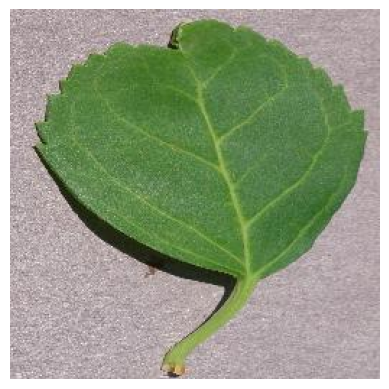

In [23]:
import matplotlib
import matplotlib.pyplot as plt

trainset = PlantClassification(train_data)
image_index = 0  # Feel free to change this.

# 1. Datasets need to implement the __len__ method for this to work.
print('This dataset has {0} training images'.format(len(trainset)))

# 2. Datasets need to implement the  __getitem__ method for this to work.
img, label = trainset[image_index]  # Returns image and label.

print('Image {0} is a {1}'.format(image_index, trainset.df['full_labels'][image_index]))
print(label)
print('Image size is {0}x{1}'.format(img.height, img.width))

# Show the image.
plt.figure();plt.imshow(img);
plt.grid(False); plt.axis('off'); plt.show()

In [24]:
!pip install livelossplot --quiet
from livelossplot import PlotLosses
from tqdm import tqdm
import torch
from torchvision import transforms


from sklearn.metrics import precision_score, recall_score, f1_score


def train_model(batch_size,
                n_epochs,
                learningRate,
                model,
                cost_function,
                optimizer,
                scheduler,
                train_loader,
                val_loader):

  # Move the model and cost function to GPU (if needed).
  model = model.to(device)
  cost_function = cost_function.to(device)

  # Keep track of best accuracy so far.
  best_accuracy = 0
  liveloss = PlotLosses()

  # Main for loop of SGD.
  for epoch in range(0, n_epochs):
    logs = {}

    # initialize control variables.
    correct = 0
    cumulative_loss = 0
    n_samples = 0
    all_preds, all_labels = [], []

    # Set the model in training mode.
    model.train()

    train_loader_tqdm = tqdm(train_loader, desc=f'Epoch {epoch+1}/{n_epochs}', leave=False)

    # Sample a batch on each iteration.
    for (batch_id, (xb, yb)) in enumerate(train_loader_tqdm):
      model.zero_grad()

      # Move (x,y) data to GPU (if so desired).
      xb = xb.to(device)
      yb = yb.to(device)

      # Compute predictions.
      predicted = model(xb)
      # print(xb.shape, yb.shape, predicted.shape)

      # Compute loss.
      loss = cost_function(predicted, yb)
      cumulative_loss += loss.item()

      # Count how many correct in batch.
      predicted_ = predicted.detach().softmax(dim = 1)
      max_vals, max_ids = predicted_.max(dim = 1)
      correct += (max_ids == yb).sum().cpu().item()
      n_samples += xb.size(0)

      all_preds.extend(max_ids.cpu().numpy())
      all_labels.extend(yb.cpu().numpy())

      # Compute gradients (autograd).
      loss.backward()

      # Run one basic training step of SGD.
      optimizer.step()
      # This does basically the following operation.
      # for param in model.parameters():
      #    param.data -= learningRate * param.grad.data

      # Keep track of loss and accuracy for the plot.
      n_batches = 1 + batch_id
      logs['loss'] = cumulative_loss / n_batches
      logs['accuracy'] = correct / n_samples

      train_loader_tqdm.set_postfix(loss=logs['loss'], acc=logs['accuracy'])

  # Compute training F1, Precision, and Recall
    logs['f1'] = f1_score(all_labels, all_preds, average='weighted')

    # initialize control variables.
    correct = 0
    cumulative_loss = 0
    n_samples = 0

    all_preds, all_labels = [], []

    # Set the model in evaluation mode.
    model.eval()

    # No need to keep track of gradients for this part.
    with torch.no_grad():
      # Run the model on the validation set to keep track of accuracy there.
      val_loader_tqdm = tqdm(val_loader, desc=f'Validation {epoch+1}/{n_epochs}', leave=False)
      for (batch_id, (xb, yb)) in enumerate(val_loader_tqdm):

        # Move data to GPU if needed.
        xb = xb.to(device)
        yb = yb.to(device)

        # Compute predictions.
        predicted = model(xb)

        # Compute loss.
        loss = cost_function(predicted, yb)
        cumulative_loss += loss.item()

        # Count how many correct in batch.
        predicted_ = predicted.detach().softmax(dim = 1)
        max_vals, max_ids = predicted_.max(dim = 1)
        correct += (max_ids == yb).sum().cpu().item()
        n_samples += xb.size(0)

        all_preds.extend(max_ids.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

        # Keep track of loss and accuracy for the plot.
        n_batches = 1 + batch_id
        logs['val_loss'] = cumulative_loss / n_batches
        logs['val_accuracy'] = correct / n_samples

        val_loader_tqdm.set_postfix(val_loss=logs['val_loss'], val_acc=logs['val_accuracy'])

      logs['val_f1'] = f1_score(all_labels, all_preds, average='weighted')

    # Save the parameters for the best accuracy on the validation set so far.
    if logs['val_accuracy'] > best_accuracy:
        best_accuracy = logs['val_accuracy']
        torch.save(model.state_dict(), 'best_model_so_far.pth')

    # Update the plot with new logging information.
    liveloss.update(logs)
    liveloss.send()

    # What is this for? Please look it up.
    if scheduler != -1:
        scheduler.step()

  # Load the model parameters for the one that achieved the best val accuracy.
  # model.load_state_dict(torch.load('best_model_so_far.pth'))

In [25]:
#The transformation we do for all datasets
commonTransform = transforms.Compose([
    transforms.Resize((256, 256)), #may change depending on model
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) #gained from commented code
])

# Data augmentation transformations
augmentTransform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    # transforms.RandomApply([transforms.RandomRotation(30)], p=0.5), #50% chace for random 30 degree rotation
    # transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2)], p=0.5) #50% chace for random pixel changes
])


# The training transformation is a combination of the two previous transformations
trainTransform = transforms.Compose([
    augmentTransform,
    commonTransform
])

#create the train, test, and validation datasets
trainDataset = PlantClassification(df = train_data, transform = trainTransform)

valDataset = PlantClassification(df = validation_data, transform = commonTransform)

testDataset = PlantClassification(df = test_data, transform = commonTransform)

In [26]:
import torchvision.models as models
import torch.nn as nn

# Load EfficientNet-B4
# model = models.efficientnet_b4(pretrained=True)
model = models.densenet121(pretrained=True)


for param in model.parameters():
  param.requires_grad = False

# # Print model architecture to inspect the input size
model.classifier = nn.Linear(model.classifier.in_features, len(folder_groups))

C:\Users\youyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\youyo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [28]:
for param in model.parameters():
  print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

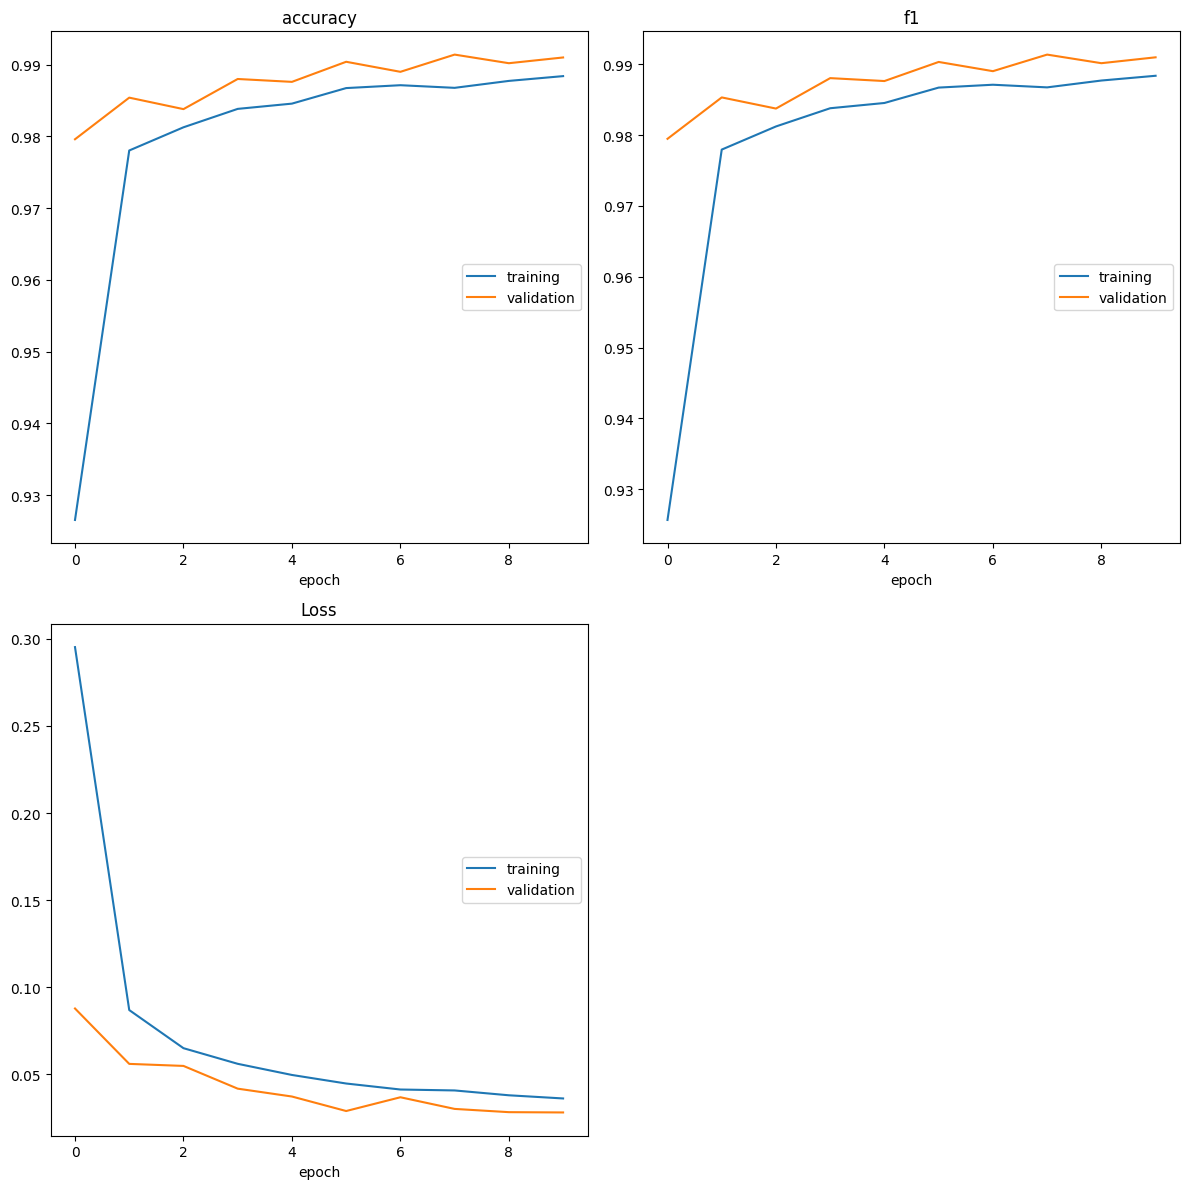

accuracy
	training         	 (min:    0.927, max:    0.988, cur:    0.988)
	validation       	 (min:    0.980, max:    0.991, cur:    0.991)
f1
	training         	 (min:    0.926, max:    0.988, cur:    0.988)
	validation       	 (min:    0.979, max:    0.991, cur:    0.991)
Loss
	training         	 (min:    0.036, max:    0.295, cur:    0.036)
	validation       	 (min:    0.028, max:    0.088, cur:    0.028)


In [29]:

import torch.optim
import torchvision.transforms as transforms

batch_size = 32
n_epochs = 10
learningRate = 0.001

cost_function = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)


train_loader = torch.utils.data.DataLoader(trainDataset,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           pin_memory = True)

val_loader = torch.utils.data.DataLoader(valDataset,
                                         batch_size = batch_size,
                                         shuffle = False)

test_loader = torch.utils.data.DataLoader(testDataset,
                                          batch_size = batch_size,
                                          shuffle = False)

train_model(batch_size, n_epochs, learningRate,
            model, cost_function, optimizer, -1,
            train_loader, val_loader);

In [30]:
# Your code here. Don't forget to call model.eval() first!

def test_model(model, test_loader):
    # initialize control variables.
    correct = 0
    n_samples = 0
    logs = {}
    all_preds, all_labels = [], []

    # Set the model in evaluation mode.
    # best_model_path = 'epoch14_model_so_far.pth'
    # model.load_state_dict(torch.load(best_model_path))
    model.eval()

    # No need to keep track of gradients for this part.
    with torch.no_grad():
      # Run the model on the validation set to keep track of accuracy there.
      for (batch_id, (xb, yb)) in enumerate(test_loader):

        # Move data to GPU if needed.
        xb = xb.to(device)
        yb = yb.to(device)

        # Compute predictions.
        predicted = model(xb)

        # # Compute loss.
        # loss = cost_function(predicted, yb)
        # cumulative_loss += loss.item()

        # Count how many correct in batch.
        predicted_ = predicted.detach().softmax(dim = 1)
        max_vals, max_ids = predicted_.max(dim = 1)
        correct += (max_ids == yb).sum().cpu().item()
        n_samples += xb.size(0)

        all_preds.extend(max_ids.cpu().numpy())
        all_labels.extend(yb.cpu().numpy())

        # Keep track of loss and accuracy for the plot.
        n_batches = 1 + batch_id
        logs['test_accuracy'] = correct / n_samples

    return logs, all_preds, all_labels


Test accuracy: 99.06%
Test F1 score: 0.99
Class Apple accuracy: 96.50%
Class Cherry_(including_sour) accuracy: 99.06%
Class Corn_(maize) accuracy: 100.00%
Class Grape accuracy: 99.60%
Class Peach accuracy: 99.71%
Class Pepper,_bell accuracy: 99.34%
Class Potato accuracy: 97.09%
Class Strawberry accuracy: 100.00%
Class Tomato accuracy: 99.21%


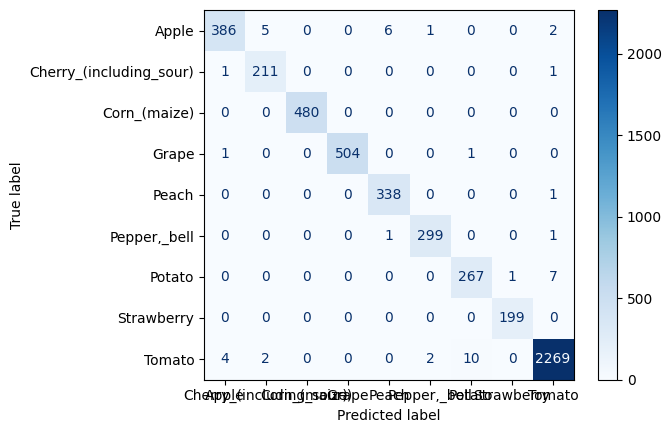

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

logs, all_preds, all_labels = test_model(model, test_loader)
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

print(f'Test accuracy: {logs["test_accuracy"] * 100:.2f}%')

test_f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Test F1 score: {test_f1:.2f}')

inverse_category2index = {v: k for k, v in category2index.items()}
label_names = [inverse_category2index[i] for i in range(len(inverse_category2index))]

class_accuracies = {}
for class_id in np.unique(all_labels):
    class_mask = all_labels == class_id
    class_accuracy = (all_labels[class_mask] == all_preds[class_mask]).mean()
    class_accuracies[class_id] = class_accuracy
    print(f'Class {label_names[class_id]} accuracy: {class_accuracy * 100:.2f}%')


conf_matrix = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_names)
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [32]:
image1, label1 = testDataset[15]
image2, label2 = valDataset[74]

In [33]:
with torch.no_grad():
    image1 = image1.unsqueeze(0).to(device)
    output1 = model(image1)
    probs1 = output1.softmax(dim=1)
    output1 = probs1.argmax(dim=1).item()
    
with torch.no_grad():
    image2 = image2.unsqueeze(0).to(device)
    output2 = model(image2)
    probs2 = output2.softmax(dim=1)
    output2 = probs2.argmax(dim=1).item()

print(f'Predicted label for image1: {output1}')
print(f'Actual label for image1: {label1}')

print(f'Predicted label for image2: {output2}')
print(f'Actual label for image2: {label2}')


Predicted label for image1: 0
Actual label for image1: 0
Predicted label for image2: 4
Actual label for image2: 4


In [34]:
print(test_data['labels'][15], inverse_category2index[test_data['labels'][15]])
print(validation_data['labels'][74], inverse_category2index[validation_data['labels'][74]])


0 Apple
4 Peach


In [35]:
test_data['imagepaths'][15]

'C:\\Users\\youyo\\.cache\\kagglehub\\datasets\\abdallahalidev\\plantvillage-dataset\\versions\\3\\plantvillage dataset\\color/Apple___Apple_scab\\88b51f59-08ed-41fe-8402-69f0964f87fe___FREC_Scab 3299.JPG'

In [36]:
validation_data['imagepaths'][74]

'C:\\Users\\youyo\\.cache\\kagglehub\\datasets\\abdallahalidev\\plantvillage-dataset\\versions\\3\\plantvillage dataset\\color/Peach___healthy\\af21b56c-130f-4598-849b-a6fb36664c42___Rutg._HL 3637.JPG'

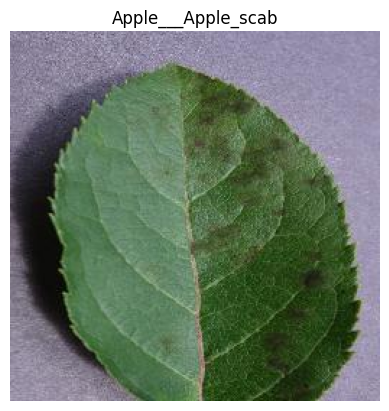

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread(test_data['imagepaths'][15])
plt.title(test_data['full_labels'][15])  # Add title here
plt.imshow(img1)
plt.axis('off')
plt.show()

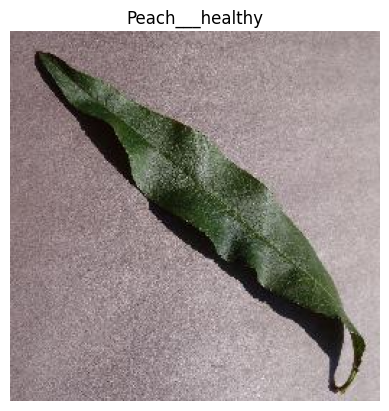

In [38]:
img2 = mpimg.imread(validation_data['imagepaths'][74])
plt.title(validation_data['full_labels'][74])  # Add title here
plt.imshow(img2)
plt.axis('off')
plt.show()